# Demo Geopandas

In [80]:
import geopandas as gpd
import pandas as pd

pd.set_option('display.max_rows', None)

In [2]:
filename = 'wijkenbuurten_2024_v1.gpkg'

In [3]:
gpd.list_layers(filename)

,name,geometry_type
0,buurten,MultiPolygon
1,gemeenten,MultiPolygon
2,wijken,MultiPolygon


In [5]:
nederland = gpd.read_file(filename, layer='gemeenten')

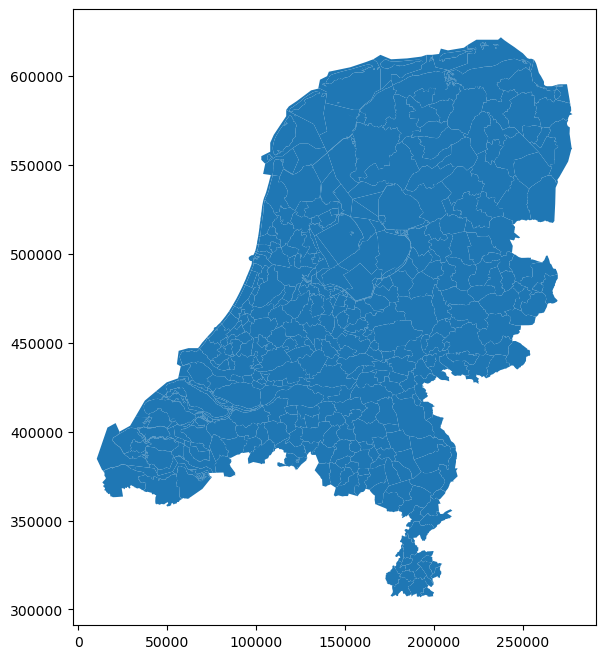

In [17]:
nederland.plot(figsize=(8, 8));

In [21]:
nederland.tail()

,gemeentecode,gemeentenaam,indelingswijziging_wijken_en_buurten,water,omgevingsadressendichtheid,stedelijkheid_adressen_per_km2,bevolkingsdichtheid_inwoners_per_km2,aantal_inwoners,mannen,vrouwen,...,afstand_tot_open_nat_natuurlijk_terrein,afstand_tot_semiopenbaar_groen_totaal,afstand_tot_sportterrein,afstand_tot_volkstuin,afstand_tot_verblijfsrecreatief_terrein,afstand_tot_recreatief_binnenwater,afstand_tot_begraafplaats,jrstatcode,jaar,geometry
419,GM1979,Eemsdelta,1,NEE,714,4,168,45106,22681,22425,...,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,2024GM1979,2024,"MULTIPOLYGON (((260500 593863.956, 260495.074 ..."
420,GM1980,Dijk en Waard,1,NEE,1480,3,1455,90076,45090,44986,...,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,2024GM1980,2024,"MULTIPOLYGON (((114099.593 527115.268, 114101...."
421,GM1982,Land van Cuijk,1,NEE,651,4,269,91722,46348,45374,...,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,2024GM1982,2024,"MULTIPOLYGON (((177400 420749, 177500 420741, ..."
422,GM1991,Maashorst,1,NEE,1195,3,431,59222,29626,29596,...,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,2024GM1991,2024,"MULTIPOLYGON (((175122.831 419335.165, 175172...."
423,GM1992,Voorne aan Zee,1,NEE,1186,3,610,74304,36802,37502,...,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,2024GM1992,2024,"MULTIPOLYGON (((74522.85 427016.5, 74523.06 42..."


In [13]:
gemeenten = nederland.query('water=="NEE"').copy()

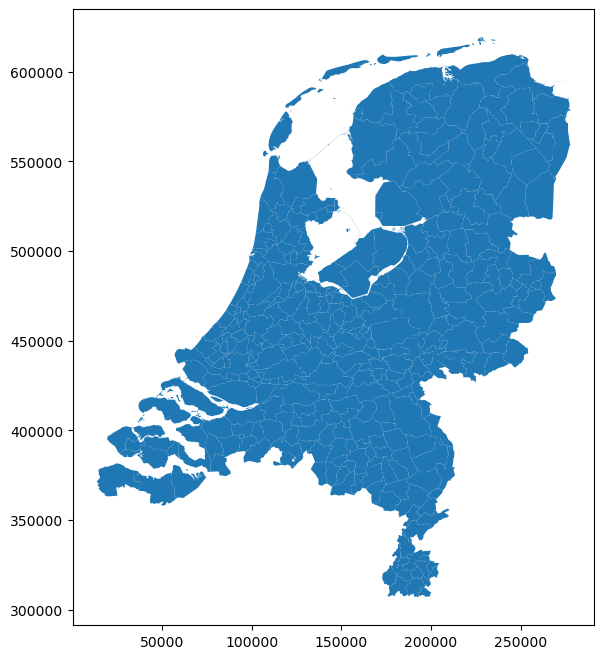

In [19]:
gemeenten.plot(figsize=(8, 8));

In [60]:
gemeenten.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 342 entries, 82 to 423
Data columns (total 220 columns):
 #    Column                                                Dtype   
---   ------                                                -----   
 0    gemeentecode                                          object  
 1    gemeentenaam                                          object  
 2    indelingswijziging_wijken_en_buurten                  int32   
 3    water                                                 object  
 4    omgevingsadressendichtheid                            int32   
 5    stedelijkheid_adressen_per_km2                        int32   
 6    bevolkingsdichtheid_inwoners_per_km2                  int32   
 7    aantal_inwoners                                       int32   
 8    mannen                                                int32   
 9    vrouwen                                               int32   
 10   percentage_personen_0_tot_15_jaar                     in

In [37]:
gemeenten[['gemeentecode', 'gemeentenaam']].sort_values('gemeentenaam').query('gemeentenaam == "Coevorden"')

,gemeentecode,gemeentenaam
100,GM0109,Coevorden


In [39]:
gemeenten.loc[gemeenten['gemeentenaam'].str.startswith('Ho'),
              ['gemeentecode', 'gemeentenaam']].sort_values('gemeentenaam')

,gemeentecode,gemeentenaam
414,GM1963,Hoeksche Waard
375,GM1735,Hof van Twente
396,GM1911,Hollands Kroon
102,GM0118,Hoogeveen
204,GM0405,Hoorn
335,GM1507,Horst aan de Maas
171,GM0321,Houten


### Bevolkingsdichtheid

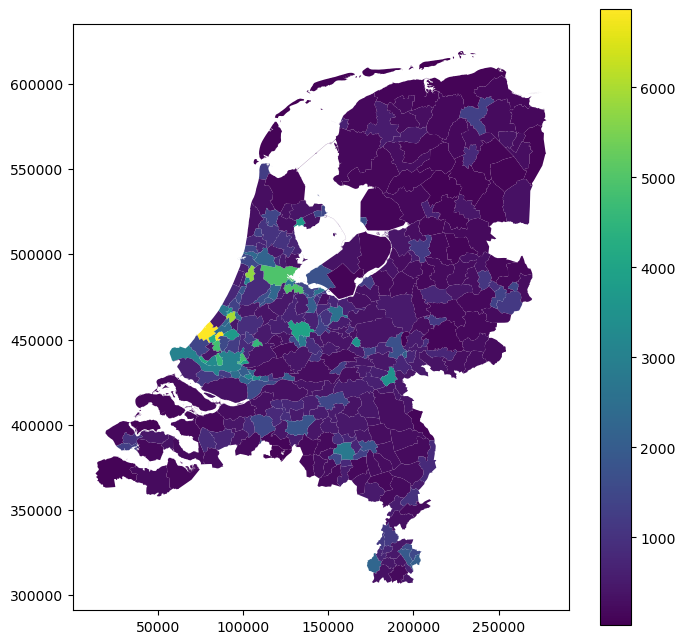

In [46]:
gemeenten.plot('bevolkingsdichtheid_inwoners_per_km2', figsize=(8, 8), legend=True);

In [52]:
column = 'bevolkingsdichtheid_inwoners_per_km2'
gemeenten.nlargest(10, column)[['gemeentenaam', column]]

,gemeentenaam,bevolkingsdichtheid_inwoners_per_km2
229,'s-Gravenhage,6868
236,Leiden,5954
197,Haarlem,5739
188,Amsterdam,4950
225,Delft,4835
224,Capelle aan den IJssel,4803
248,Schiedam,4596
228,Gouda,4592
247,Rijswijk (ZH.),4267
239,Maassluis,4243


In [53]:
column = 'bevolkingsdichtheid_inwoners_per_km2'
gemeenten.nsmallest(10, column)[['gemeentenaam', column]]

,gemeentenaam,bevolkingsdichtheid_inwoners_per_km2
94,Schiermonnikoog,23
97,Vlieland,30
96,Terschelling,56
152,Rozendaal,66
88,Ameland,68
359,Westerveld,72
365,Sluis,83
214,Texel,85
355,Noord-Beveland,92
273,Baarle-Nassau,93


### Man Vrouw verhouding

In [55]:
gemeenten['man_vrouw'] = gemeenten['mannen'] / gemeenten['vrouwen']

<Axes: >

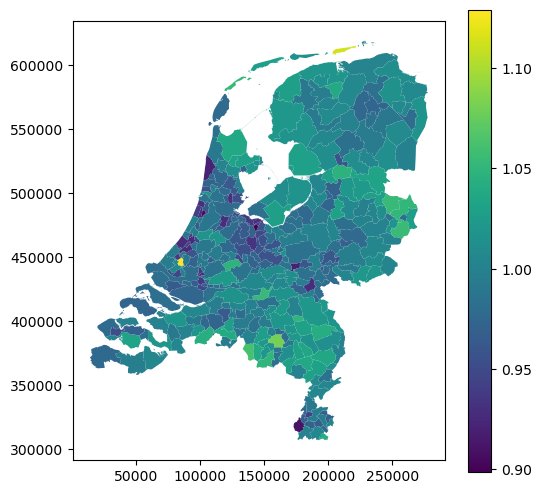

In [56]:
gemeenten.plot('man_vrouw', legend=True, figsize=(6, 6))

In [58]:
col = 'man_vrouw'
gemeenten.nlargest(10, col)[['gemeentenaam', col]]

,gemeentenaam,man_vrouw
225,Delft,1.128990
94,Schiermonnikoog,1.113043
283,Eindhoven,1.080592
348,Reusel-De Mierden,1.062120
108,Enschede,1.054442
120,Tubbergen,1.054046
97,Vlieland,1.054010
145,Maasdriel,1.053539
380,Dinkelland,1.050222
369,Bergeijk,1.049760


In [59]:
gemeenten.nsmallest(10, col)[['gemeentenaam', col]]

,gemeentenaam,man_vrouw
207,Laren (NH.),0.898904
200,Heemstede,0.905331
321,Maastricht,0.909803
156,Wageningen,0.919962
189,Bergen (NH.),0.921181
236,Leiden,0.926641
397,Leidschendam-Voorburg,0.927107
254,Wassenaar,0.927865
235,Krimpen aan den IJssel,0.928399
187,Amstelveen,0.928435


In [64]:
wijken = gpd.read_file(filename, layer='wijken').query('water=="NEE"')

In [65]:
wijken.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3393 entries, 82 to 3474
Data columns (total 221 columns):
 #    Column                                                Dtype   
---   ------                                                -----   
 0    wijkcode                                              object  
 1    wijknaam                                              object  
 2    gemeentecode                                          object  
 3    gemeentenaam                                          object  
 4    indelingswijziging_wijken_en_buurten                  int32   
 5    water                                                 object  
 6    omgevingsadressendichtheid                            int32   
 7    stedelijkheid_adressen_per_km2                        int32   
 8    bevolkingsdichtheid_inwoners_per_km2                  int32   
 9    aantal_inwoners                                       int32   
 10   mannen                                                

In [69]:
wijken.query('gemeentenaam=="Harderwijk"')[['gemeentenaam', 'wijknaam']]

,gemeentenaam,wijknaam
689,Harderwijk,Binnenstad
690,Harderwijk,Waterfront
691,Harderwijk,Zeebuurt
692,Harderwijk,Friesegracht
693,Harderwijk,Stadsdennen
694,Harderwijk,De Sypel
695,Harderwijk,Stationsomgeving
696,Harderwijk,Stadsweiden
697,Harderwijk,Slingerbos
698,Harderwijk,Tweelingstad


In [71]:
wijken.query('gemeentenaam=="Coevorden"').explore()

In [73]:
buurten = gpd.read_file(filename, layer='buurten').query('water=="NEE"')

In [75]:
buurten.query('gemeentenaam=="Coevorden"').explore()

In [85]:
buurten.query('gemeentenaam=="Coevorden"')[['buurtnaam', 'gemeentenaam','aantal_inwoners','mannen','vrouwen']].head(100).sort_values(['gemeentenaam', 'buurtnaam'])

,buurtnaam,gemeentenaam,aantal_inwoners,mannen,vrouwen
1150,'t Haantje,Coevorden,210,115,95
1165,Aalden,Coevorden,1575,750,830
1160,Achterste Erm,Coevorden,90,50,45
1112,Ballast,Coevorden,1640,840,805
1171,Benneveld,Coevorden,145,70,70
1109,Binnenvree Buitenvree Pikveld,Coevorden,3045,1510,1530
1106,Coevorden-Centrum,Coevorden,2260,1095,1160
1127,Dalen,Coevorden,3225,1605,1620
1131,Dalerpeel,Coevorden,575,310,260
1133,Dalerveen,Coevorden,305,165,140


In [83]:
buurten.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 14574 entries, 94 to 14667
Data columns (total 224 columns):
 #    Column                                                Dtype   
---   ------                                                -----   
 0    buurtcode                                             object  
 1    buurtnaam                                             object  
 2    wijkcode                                              object  
 3    gemeentecode                                          object  
 4    gemeentenaam                                          object  
 5    indelingswijziging_wijken_en_buurten                  int32   
 6    water                                                 object  
 7    meest_voorkomende_postcode                            object  
 8    dekkingspercentage                                    int32   
 9    omgevingsadressendichtheid                            int32   
 10   stedelijkheid_adressen_per_km2                      